In [430]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from collections import Counter
import warnings 
warnings.filterwarnings("ignore")
import os

**Load and Check Data**

In [431]:
train_data=pd.read_csv("/kaggle/input/d/rabiagzel/titanic-dataset/train.csv")

In [432]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# **Univariate Variable Analysis**

**Categorical Variable**

In [433]:
def bar_plot(variable):
    var=train_data[variable]
    varValue=var.value_counts()

    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n {}".format(variable,varValue))

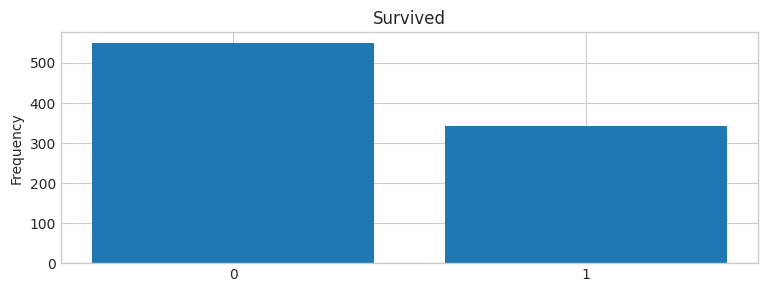

Survived:
 Survived
0    549
1    342
Name: count, dtype: int64


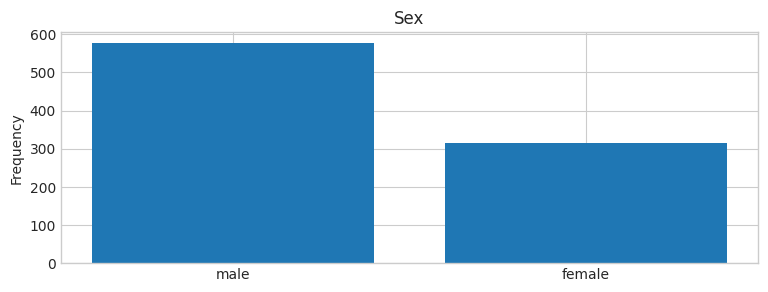

Sex:
 Sex
male      577
female    314
Name: count, dtype: int64


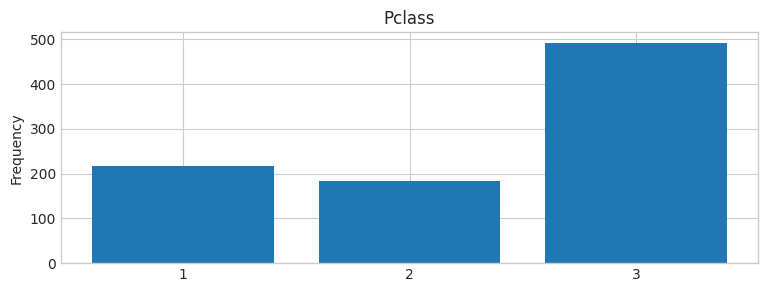

Pclass:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


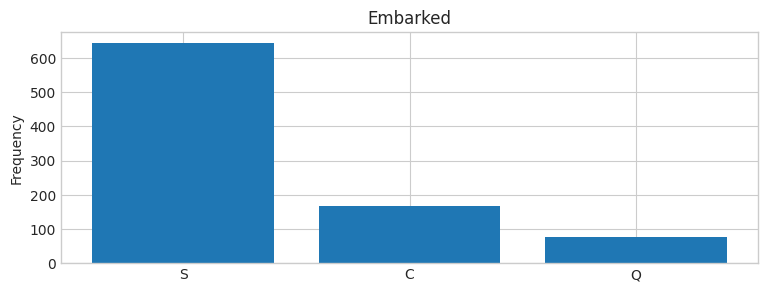

Embarked:
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


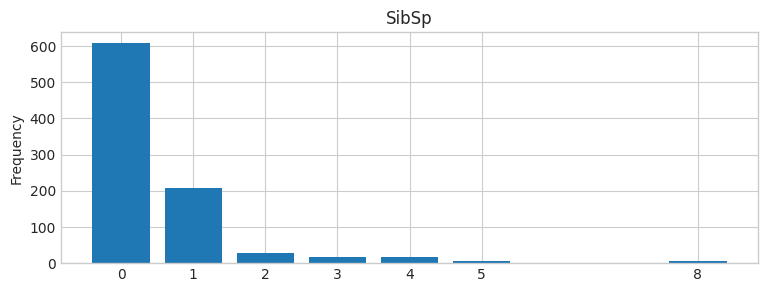

SibSp:
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


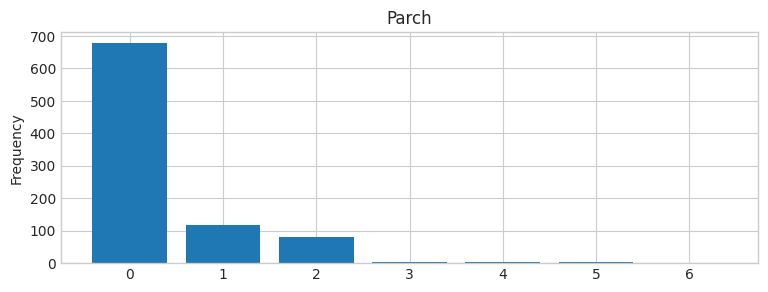

Parch:
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [434]:
category1=["Survived","Sex","Pclass","Embarked","SibSp","Parch"]
for c in category1:
    bar_plot(c)

In [435]:
category2=["Cabin","Name","Ticket"]
for c in category2:
    print("{}: \n".format(train_data[c].value_counts()))

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64: 

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64: 

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64: 



**Numeric Variable**

In [436]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(train_data[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))

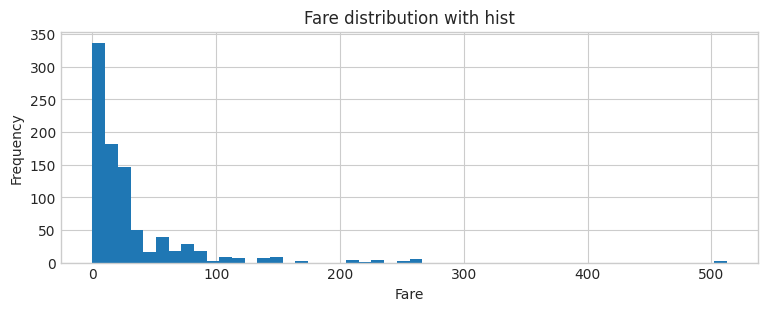

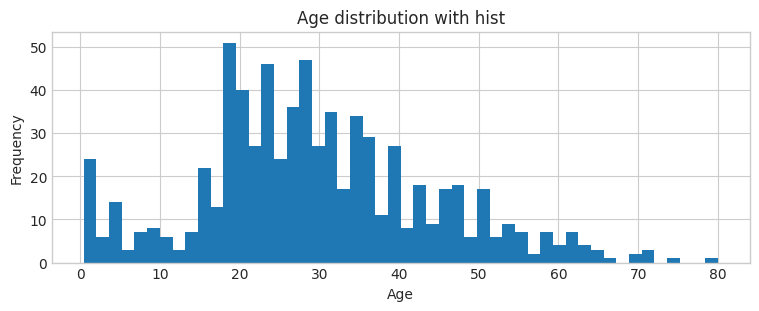

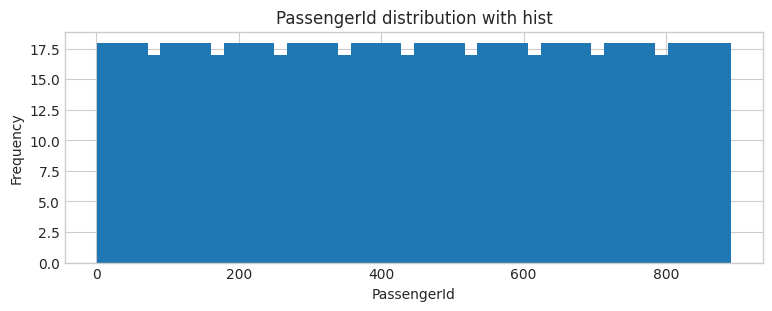

In [437]:
numericVar=["Fare","Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

# **Basic Data Analysis**

In [438]:
train_data[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [439]:
train_data[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [440]:
train_data[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [441]:
train_data[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# **Outlier Detection**

In [442]:
def detect_outliers(df,features):
    outlier_indices=[]
    for c in features:
        Q1=np.percentile(df[c],25)
        Q3=np.percentile(df[c],75)
        IQR=Q3-Q1
        outlier_step=IQR*1.5
        outlier_list_col=df[(df[c]<Q1-outlier_step)| (df[c]>Q3+outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices=Counter(outlier_indices)
    multiple_outliers=list(i for i,v in outlier_indices.items() if v >2)

    return multiple_outliers

In [443]:
train_data.loc[detect_outliers(train_data,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [444]:
train_data=train_data.drop(detect_outliers(train_data,["Age","SibSp","Parch","Fare"]),axis=0).reset_index(drop=True)

# **Missing Value**

In [445]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

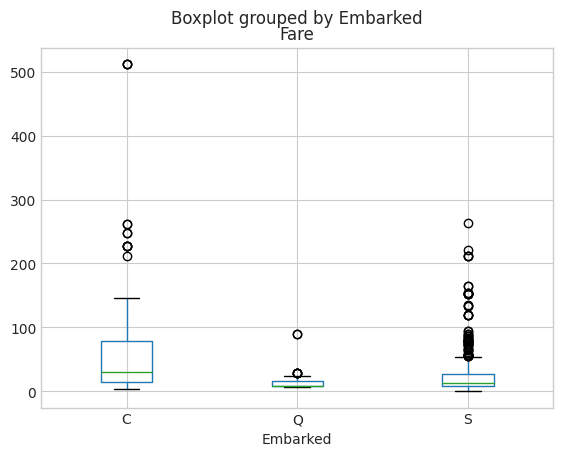

In [446]:
train_data.boxplot(column="Fare",by="Embarked")
plt.show()

In [447]:
train_data["Embarked"]=train_data["Embarked"].fillna("C")
train_data[train_data["Embarked"].isnull()]#control

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


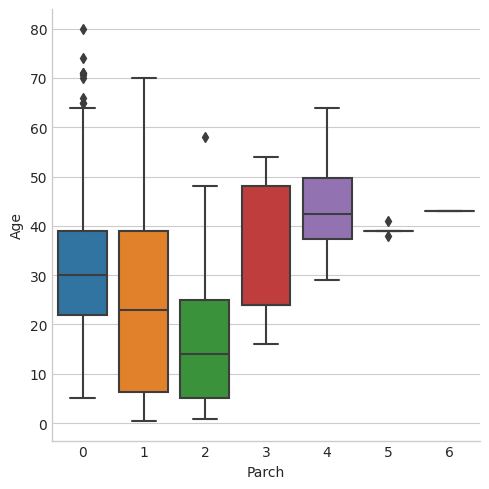

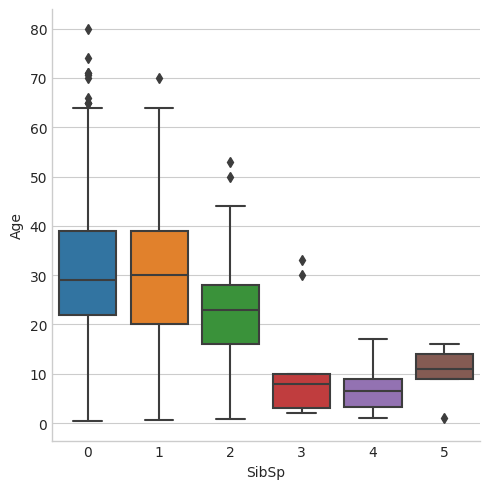

In [448]:
sns.catplot(x="Parch",y="Age",data=train_data,kind="box")
sns.catplot(x="SibSp",y="Age",data=train_data,kind="box")


In [449]:
index_nan_age = list(train_data["Age"][train_data["Age"].isnull()].index)

for i in index_nan_age:
    age_pred = train_data["Age"][
        (train_data["SibSp"] == train_data.iloc[i]["SibSp"]) &
        (train_data["Parch"] == train_data.iloc[i]["Parch"]) &
        (train_data["Pclass"] == train_data.iloc[i]["Pclass"])
    ].median()
    
    age_med = train_data["Age"].median()
    
    if pd.notna(age_pred):
        train_data.loc[i, "Age"] = age_pred
    else:
        train_data.loc[i, "Age"] = age_med


In [450]:
train_data[train_data["Age"].isnull()]#control

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# **Visualization**

**Correlation**

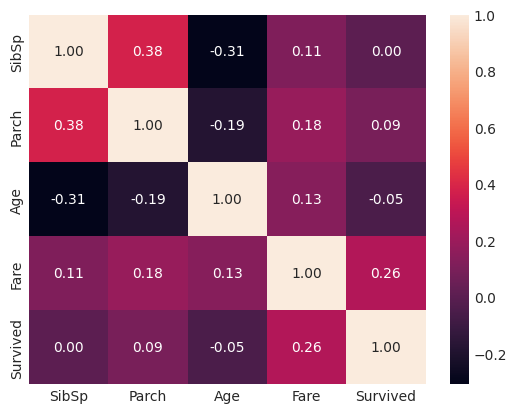

In [451]:
list1=["SibSp","Parch","Age","Fare","Survived"]
sns.heatmap(train_data[list1].corr(),annot=True,fmt=".2f")
plt.show()

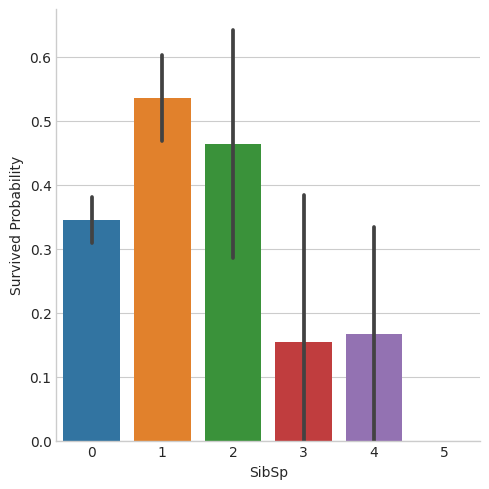

In [452]:
g=sns.catplot(x="SibSp",y="Survived",data=train_data,kind="bar")
g.set_ylabels("Survived Probability")

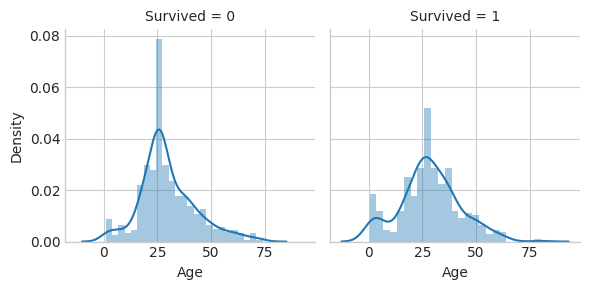

In [453]:
g=sns.FacetGrid(train_data,col="Survived")
g.map(sns.distplot,"Age",bins=25)


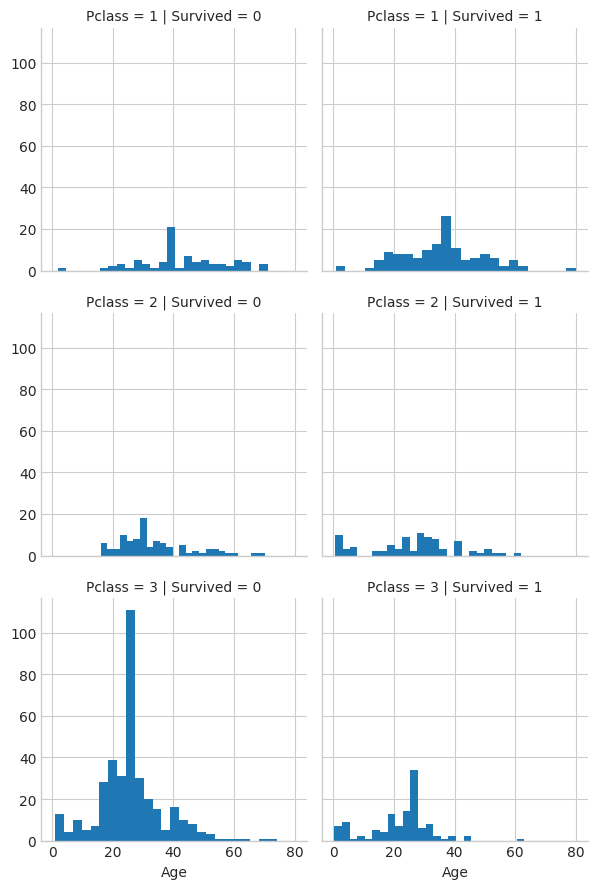

In [454]:
g=sns.FacetGrid(train_data,col="Survived",row="Pclass")
g.map(plt.hist,"Age",bins=25)
g.add_legend()

# **Feature Engineering**

**Name Title**

In [455]:
train_data["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [456]:
name=train_data["Name"]
train_data["Title"]=[i.split(".")[0].split(",")[-1].strip() for i in name]

In [457]:
train_data["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Mr'),
  Text(1, 0, 'Mrs'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'Don'),
  Text(5, 0, 'Rev'),
  Text(6, 0, 'Dr'),
  Text(7, 0, 'Mme'),
  Text(8, 0, 'Ms'),
  Text(9, 0, 'Major'),
  Text(10, 0, 'Lady'),
  Text(11, 0, 'Sir'),
  Text(12, 0, 'Mlle'),
  Text(13, 0, 'Col'),
  Text(14, 0, 'Capt'),
  Text(15, 0, 'the Countess'),
  Text(16, 0, 'Jonkheer')])

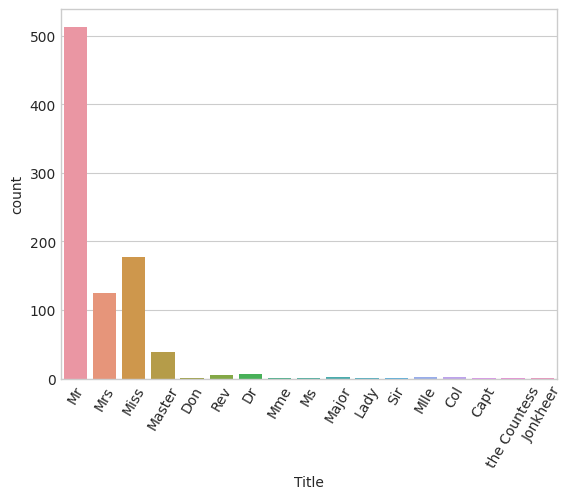

In [458]:
sns.countplot(x="Title",data=train_data)
plt.xticks(rotation=60)

In [459]:
train_data["Title"]=train_data["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
train_data["Title"]=[0 if i =="Master" else 1 if i == "Miss" or i== "Ms" or i=="Mlle" or i== "Mrs" else 2 if i =="Mr" else 3 for i in train_data["Title"]]
train_data["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

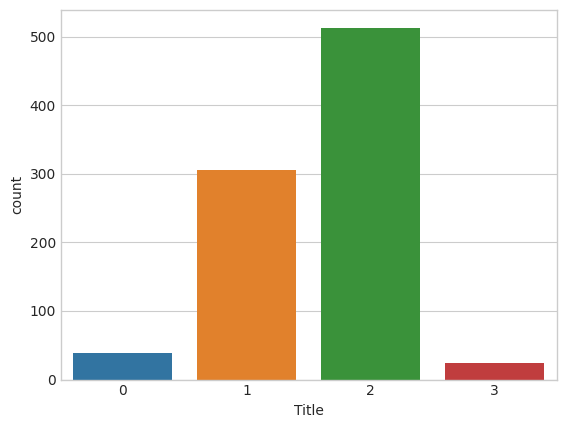

In [460]:
sns.countplot(x="Title",data=train_data)
plt.xticks()
plt.show()

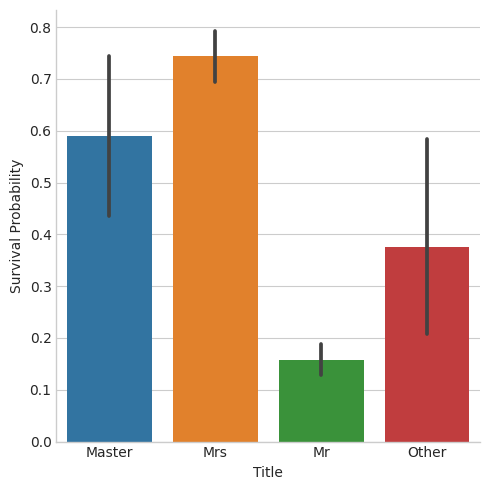

In [461]:
g=sns.catplot(x="Title",y="Survived",data=train_data,kind="bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [462]:
train_data.drop(labels=["Name"],axis=1,inplace=True)


In [463]:
train_data=pd.get_dummies(train_data,columns=["Title"])
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False


**Family Size**

In [464]:
train_data["Fsize"]=train_data["SibSp"]+train_data["Parch"]+1

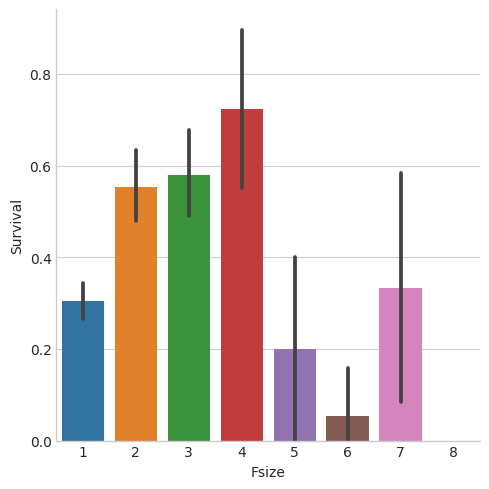

In [465]:
g=sns.catplot(x="Fsize",y="Survived",data=train_data,kind="bar")
g.set_ylabels("Survival")
plt.show()

In [466]:
train_data["family_size"]=[1 if i <5 else 0 for i in train_data["Fsize"]]

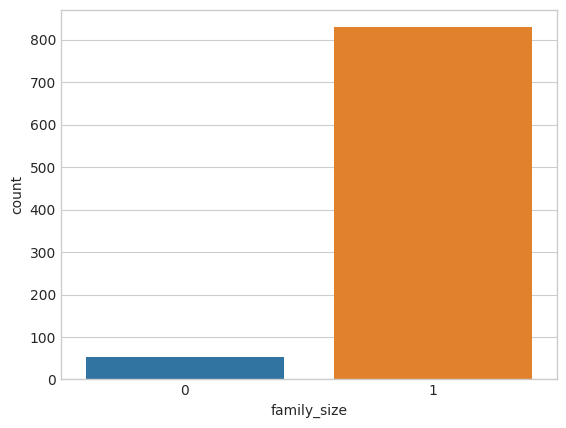

In [467]:
sns.countplot(x="family_size",data=train_data)
plt.show()

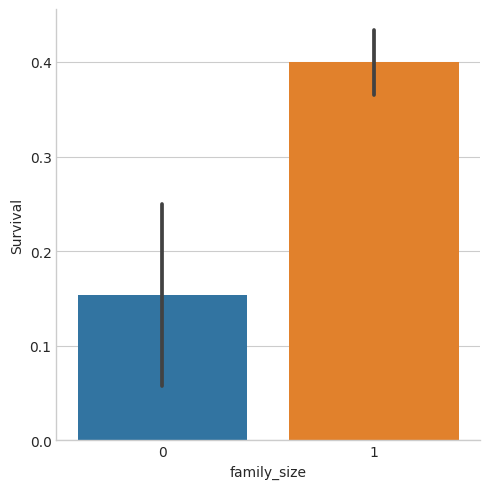

In [468]:
g=sns.catplot(x="family_size",y="Survived",data=train_data,kind="bar")
g.set_ylabels("Survival")
plt.show()

In [469]:
train_data=pd.get_dummies(train_data,columns=["family_size"])
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,False,True
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,False,True
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,False,True
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,False,True
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,False,True


**Embarked**

In [470]:
train_data=pd.get_dummies(train_data,columns=["Embarked"])
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,2,False,True,False,False,True
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,False,True,False,False,2,False,True,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,False,False,1,False,True,False,False,True
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,False,True,False,False,2,False,True,False,False,True
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,False,False,True,False,1,False,True,False,False,True


**Ticket**

In [471]:
train_data["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [472]:
a="A/5. 2151"
a.replace(".","").replace("/","").strip().split(" ")[0]

'A5'

In [473]:
tickets=[]
for i in list(train_data.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("X")
train_data["Ticket"]=tickets

In [474]:
train_data=pd.get_dummies(train_data,columns=["Ticket"],prefix="T")
train_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_X
0,1,0,3,male,22.0,1,0,7.2500,NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,female,38.0,1,0,71.2833,C85,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,female,26.0,0,0,7.9250,NaN,False,...,False,False,False,False,False,True,False,False,False,False
3,4,1,1,female,35.0,1,0,53.1000,C123,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,male,35.0,0,0,8.0500,NaN,False,...,False,False,False,False,False,False,False,False,False,True
5,6,0,3,male,26.0,0,0,8.4583,NaN,False,...,False,False,False,False,False,False,False,False,False,True
6,7,0,1,male,54.0,0,0,51.8625,E46,False,...,False,False,False,False,False,False,False,False,False,True
7,8,0,3,male,2.0,3,1,21.0750,NaN,True,...,False,False,False,False,False,False,False,False,False,True
8,9,1,3,female,27.0,0,2,11.1333,NaN,False,...,False,False,False,False,False,False,False,False,False,True
9,10,1,2,female,14.0,1,0,30.0708,NaN,False,...,False,False,False,False,False,False,False,False,False,True


**Pclass**

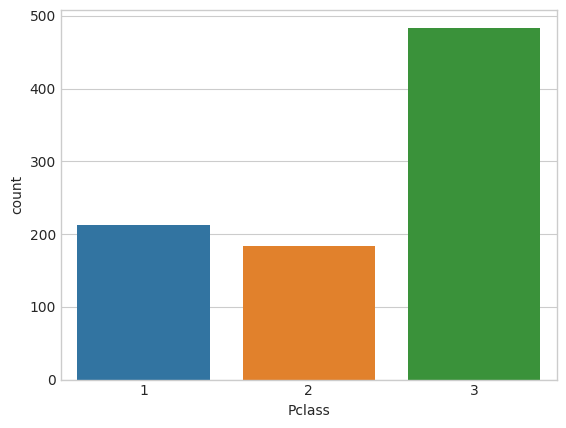

In [475]:
sns.countplot(x="Pclass",data=train_data)
plt.show()

In [476]:
train_data["Pclass"]=train_data["Pclass"].astype("category")
train_data=pd.get_dummies(train_data,columns=["Pclass"])
train_data.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_X,Pclass_1,Pclass_2,Pclass_3
0,1,0,male,22.0,1,0,7.2500,NaN,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,female,38.0,1,0,71.2833,C85,False,True,...,False,False,False,False,False,False,False,True,False,False
2,3,1,female,26.0,0,0,7.9250,NaN,False,True,...,False,False,True,False,False,False,False,False,False,True
3,4,1,female,35.0,1,0,53.1000,C123,False,True,...,False,False,False,False,False,False,True,True,False,False
4,5,0,male,35.0,0,0,8.0500,NaN,False,False,...,False,False,False,False,False,False,True,False,False,True


**Sex**

In [477]:
train_data["Sex"]=train_data["Sex"].astype("category")
train_data=pd.get_dummies(train_data,columns=["Sex"])
train_data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONO2,T_SWPP,T_WC,T_WEP,T_X,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,22.0,1,0,7.2500,NaN,False,False,True,...,False,False,False,False,False,False,False,True,False,True
1,2,1,38.0,1,0,71.2833,C85,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,3,1,26.0,0,0,7.9250,NaN,False,True,False,...,True,False,False,False,False,False,False,True,True,False
3,4,1,35.0,1,0,53.1000,C123,False,True,False,...,False,False,False,False,True,True,False,False,True,False
4,5,0,35.0,0,0,8.0500,NaN,False,False,True,...,False,False,False,False,True,False,False,True,False,True


**Drop PassengerId and Cabin**

In [478]:
train_data.drop(labels=["PassengerId","Cabin"],axis=1,inplace=True)
train_data.head()

,Survived,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,...,T_STONO2,T_SWPP,T_WC,T_WEP,T_X,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,False,False,True,False,2,...,False,False,False,False,False,False,False,True,False,True
1,1,38.0,1,0,71.2833,False,True,False,False,2,...,False,False,False,False,False,True,False,False,True,False
2,1,26.0,0,0,7.9250,False,True,False,False,1,...,True,False,False,False,False,False,False,True,True,False
3,1,35.0,1,0,53.1000,False,True,False,False,2,...,False,False,False,False,True,True,False,False,True,False
4,0,35.0,0,0,8.0500,False,False,True,False,1,...,False,False,False,False,True,False,False,True,False,True


# **Modeling**

In [479]:
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

**Train-Test**

In [480]:
train=train_data[:len(train_data)]
X_train=train.drop(labels="Survived",axis=1)
y_train=train["Survived"]
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.33,random_state=42)
random_state=42


**Simple Logistic Regression**

In [481]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 500,1000],
    'penalty': ['l1','l2'],
    'solver': ['newton-cg','lbfgs', 'liblinear']
}
grid_search = GridSearchCV(LogisticRegression(random_state=random_state), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

log_accuracy=accuracy_score(y_test,y_pred)
print("Accuracy Score:",round(log_accuracy*100,2))

print("Best parameters found: ", grid_search.best_params_)


Accuracy Score: 81.44
Best parameters found:  {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


**Decision Tree Classifier**

In [482]:
dt_param_grid={
    'min_samples_split':[2,5,10],
    'max_depth':[None,10]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=random_state), dt_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

dt_accuracy=accuracy_score(y_test,y_pred)
print("Accuracy Score:",round(dt_accuracy*100,2))

print("Best parameters found: ", grid_search.best_params_)

Accuracy Score: 80.07
Best parameters found:  {'max_depth': 10, 'min_samples_split': 10}


**SVC**

In [483]:
svc_param_grid={
    'kernel':['rbf'],
    'gamma':['scale','auto'],
    'C':[1,10,20,50,100,200,300,1000]
}
grid_search = GridSearchCV(SVC(random_state=random_state), svc_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

svc_accuracy=accuracy_score(y_test,y_pred)
print("Accuracy Score:",round(svc_accuracy*100,2))

print("Best parameters found: ", grid_search.best_params_)

Accuracy Score: 82.82
Best parameters found:  {'C': 200, 'gamma': 'scale', 'kernel': 'rbf'}


**Random Forest Classifier**

In [484]:
rf_param_grid={
    'n_estimators':[50,100,300],
    'max_features':[1,3,10],
    'min_samples_split':[2,3,10],
    'min_samples_leaf':[2,3,10],
    'bootstrap':[False],
    'criterion':["gini"]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=random_state), rf_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

rf_accuracy=accuracy_score(y_test,y_pred)
print("Accuracy Score:",round(rf_accuracy*100,2))

print("Best parameters found: ", grid_search.best_params_)

Accuracy Score: 81.1
Best parameters found:  {'bootstrap': False, 'criterion': 'gini', 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}


**KNN**

In [485]:
knn_param_grid={
    'n_neighbors':[3,5,10],
    'weights':["uniform","distance"],
    'leaf_size':[20,30,40]
    
}
grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

knn_accuracy=accuracy_score(y_test,y_pred)
print("Accuracy Score:",round(knn_accuracy*100,2))

print("Best parameters found: ", grid_search.best_params_)

Accuracy Score: 71.48
Best parameters found:  {'leaf_size': 20, 'n_neighbors': 3, 'weights': 'uniform'}


**Comprase Results**

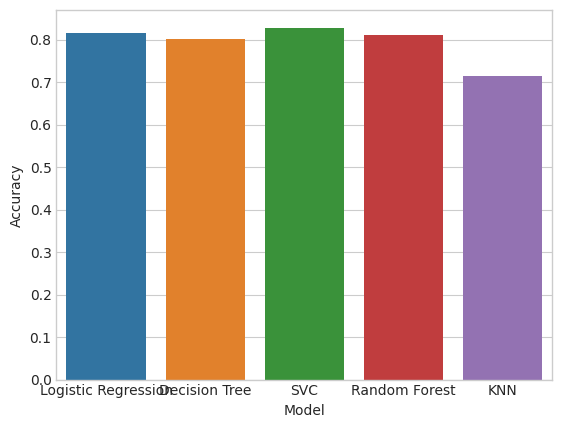

In [486]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "SVC", "Random Forest", "KNN"],
    "Accuracy": [log_accuracy, dt_accuracy, svc_accuracy, rf_accuracy, knn_accuracy]
})
s = sns.barplot(data=results, x="Model", y="Accuracy")